# Data Exploration

Dataset: [Wholesale Customer Dataset](https://archive.ics.uci.edu/dataset/292/wholesale+customers)

In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN

ROOT_DIR = Path.cwd().parent
DATA_DIR = ROOT_DIR / 'data'

In [19]:
data = pd.read_csv(DATA_DIR / 'train_test/X_train.csv')
target = pd.read_csv(DATA_DIR / 'train_test/y_train.csv')

print('Data shape:', data.shape)
display(data.head())
print('Target shape:', target.shape)
display(target.head())

Data shape: (352, 7)


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,572,9763,22182,2221,4882,2563
1,1,21273,2013,6550,909,811,1854
2,1,2612,4339,3133,2088,820,985
3,2,11867,3327,4814,1178,3837,120
4,2,5283,13316,20399,1809,8752,172


Target shape: (352, 1)


,Region
0,1
1,2
2,3
3,3
4,2


## Label Analysis


Value Counts:


Region
3    242
1     68
2     42
Name: count, dtype: int64

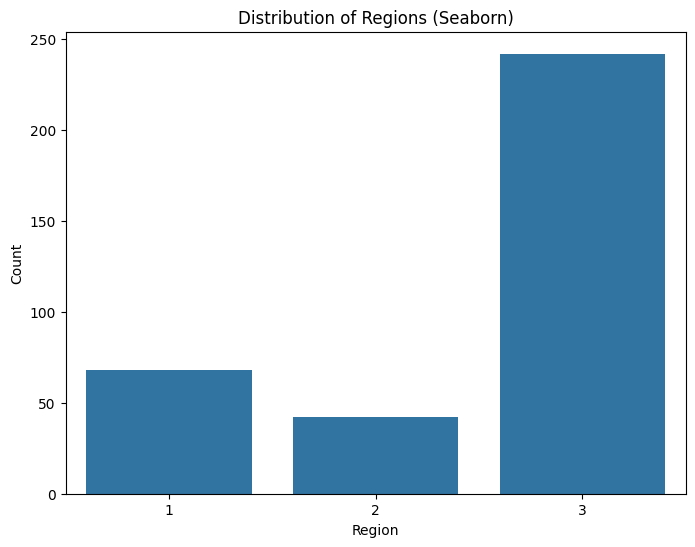

In [20]:
# Display value counts
print("\nValue Counts:")
display(target['Region'].value_counts())

# Add seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=target, x='Region')
plt.title('Distribution of Regions (Seaborn)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## Feature dataset analysis

Summary Statistics:


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,1.338068,11522.650568,5890.048295,8166.241477,2932.426136,3028.857955,1570.218750
std,0.473725,11339.250187,7689.050714,10047.804806,4755.733393,5059.782371,3062.706952
min,1.000000,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,1.000000,3126.250000,1587.750000,2156.500000,761.250000,256.750000,405.750000
50%,1.000000,8130.000000,3687.000000,4855.500000,1498.000000,832.000000,974.500000
75%,2.000000,16933.750000,7166.250000,10725.500000,3532.500000,4038.750000,1820.250000
max,2.000000,76237.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Correlation Matrix:


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,-0.157258,0.463697,0.596117,-0.185622,0.625775,0.047013
Fresh,-0.157258,1.000000,0.087746,-0.008747,0.334326,-0.096436,0.250026
Milk,0.463697,0.087746,1.000000,0.728516,0.129047,0.669252,0.398482
Grocery,0.596117,-0.008747,0.728516,1.000000,-0.018635,0.930833,0.192295
Frozen,-0.185622,0.334326,0.129047,-0.018635,1.000000,-0.115978,0.426402
Detergents_Paper,0.625775,-0.096436,0.669252,0.930833,-0.115978,1.000000,0.058435
Delicassen,0.047013,0.250026,0.398482,0.192295,0.426402,0.058435,1.000000


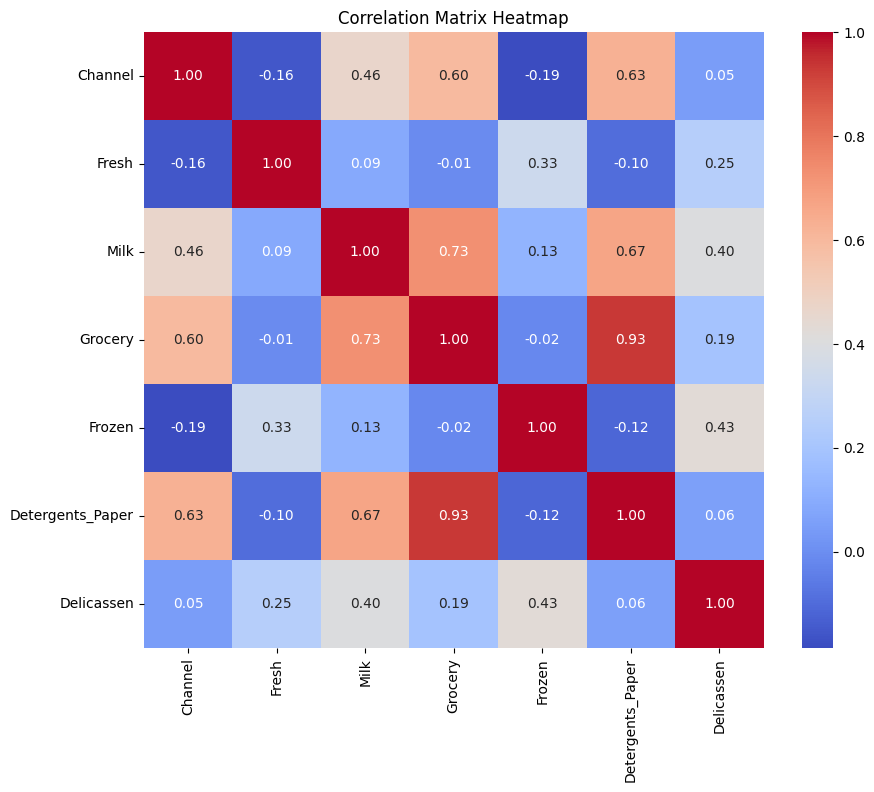

In [21]:
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:")
display(summary_stats)

# Correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Feature Engineering

Resampled Data Shape: (723, 7)
Resampled Target Shape: (723,)


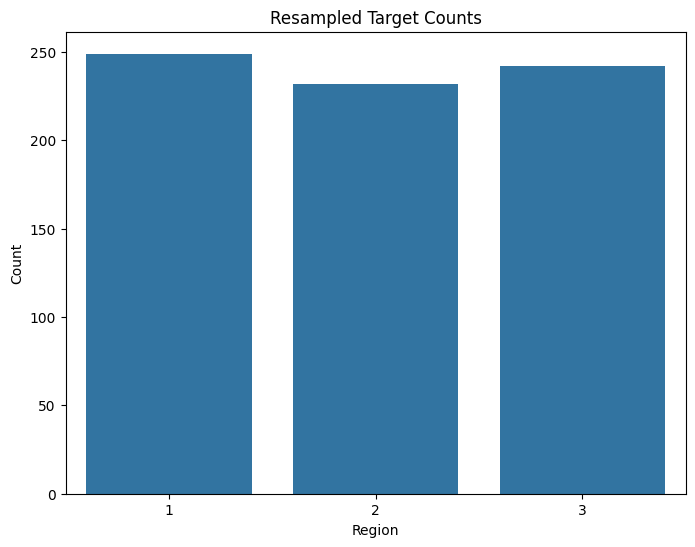

In [26]:
# Apply SMOTE for handling class imbalance
smote = ADASYN(random_state=42)
data_resampled, target_resampled = smote.fit_resample(data, target['Region'])

# Save resampled data
data_resampled.to_csv(DATA_DIR / 'processed/data_resampled.csv', index=False)
target_resampled.to_csv(DATA_DIR / 'processed/target_resampled.csv', index=False)

# Display resampled data shape
print("Resampled Data Shape:", data_resampled.shape)
print("Resampled Target Shape:", target_resampled.shape)

# Plot resampled target counts
plt.figure(figsize=(8, 6))
sns.countplot(x=target_resampled)
plt.title('Resampled Target Counts')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Put some other analysis here